### 4.2

#### 4.2.1

In [0]:
import numpy as np

In [0]:
def mean_squared_error(y, t):
  return 0.5 * np.sum((y - t) ** 2)

In [6]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0] ## '2'的概率最高
mean_squared_error(np.array(y), np.array(t))
# print(len(y))
# print(len(t))

0.09750000000000003

In [7]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]## '7'的概率最高
mean_squared_error(np.array(y), np.array(t))

0.5975

#### 4.2.2

In [14]:
x = np.arange(0.1, 1.1, 0.1)
x

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [15]:
y = np.log(x)
y

array([-2.30258509, -1.60943791, -1.2039728 , -0.91629073, -0.69314718,
       -0.51082562, -0.35667494, -0.22314355, -0.10536052,  0.        ])

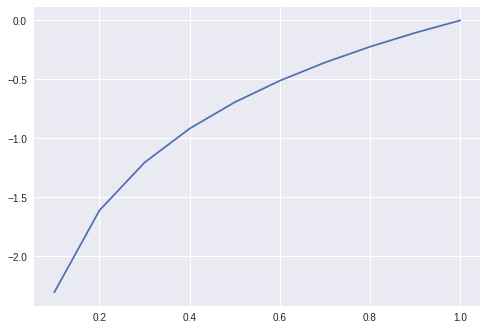

In [16]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

In [0]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

In [19]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [20]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

#### 4.2.4

##### one-hot , batch_size

In [0]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

##### non-one-hot

In [0]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 4.3

#### 4.3.1

In [0]:
def numerical_diff(f, x):
  h = 10e-50
  return (f(x+h) - f(x)) / h

In [0]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2 * h)

#### 4.3.2

In [0]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

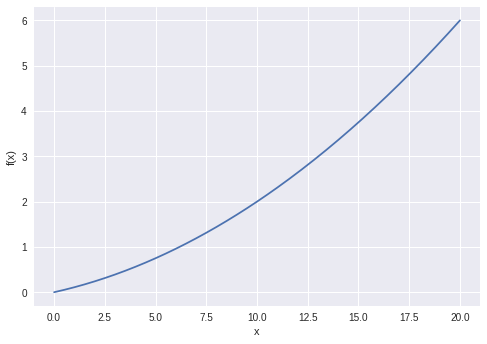

In [27]:
x = np.arange(0.0, 20.1, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [0]:
k1 = numerical_diff(function_1, 5)

In [0]:
k2 = numerical_diff(function_1, 10)

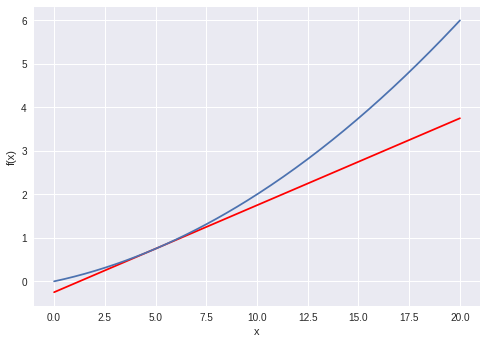

In [34]:
x = np.arange(0.0, 20.1, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
l1 = k1*(x - 5) + function_1(5)
plt.plot(x,l1, c='r')
plt.plot(x,y)
plt.show()

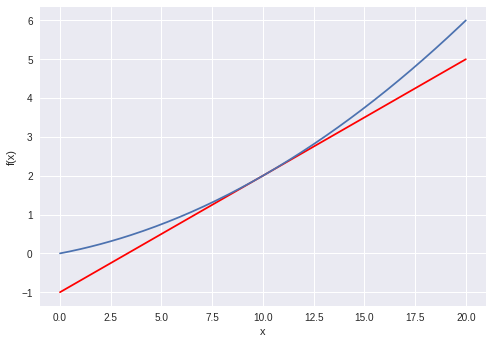

In [35]:
x = np.arange(0.0, 20.1, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
l2 = k2*(x - 10) + function_1(10)
plt.plot(x,l2, c='r')
plt.plot(x,y)
plt.show()

#### 4.3.3

In [0]:
def function_2(x):
  return x[0] ** 2 + x[1] ** 2

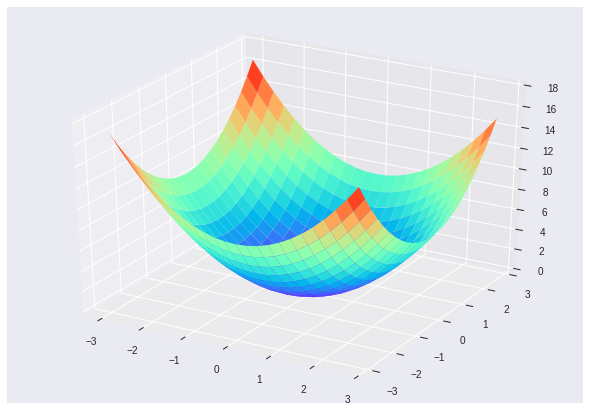

In [45]:
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-3, 3, 0.25)
Y = np.arange(-3, 3, 0.25)
X, Y = np.meshgrid(X, Y)
R = function_2([X,Y])
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, R, rstride=1, cstride=1, cmap='rainbow')
plt.show()

### 4.4

In [0]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)
  
  for idx in range(x.size):
    tmp_val = x[idx]
    # f(x + h)计算
    x[idx] = tmp_val + h
    fxh1 = f(x)
    
    # f(x-h)计算
    x[idx] = tmp_val - h
    fxh2 = f(x)
    
    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val
  
  return grad

In [49]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [50]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

#### 4.4.1

In [0]:
def gradient_descent(f, init_x, lr = 0.01, step_num=100):
  x = init_x
  signal=[]
  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
    signal.append([x])
  return x,signal

In [0]:
def function_2(x):
  return x[0] ** 2 + x[1] ** 2

In [74]:
init_x = np.array([-3.0, 4.0])
_, signal = gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)
signal

[[array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814391e-10])],
 [array([-6.11110793e-10,  8.14814

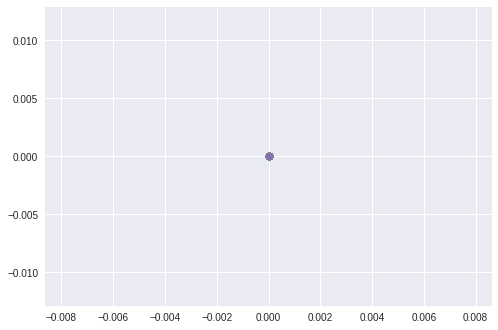

In [73]:
for d in signal:
  plt.scatter(d[0][0],d[0][1])
# plt.show()

#### 4.4.2

In [0]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [0]:
class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3)
  def predict(self, x):
    return np.dot(x, self.W)
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss

In [88]:
net = simpleNet()
print(net.W)

[[ 0.35252803 -0.43172008 -0.58464237]
 [-0.7725141  -0.31628595  0.22019968]]


In [0]:
x = np.array([0.6,0.9])
p = net.predict(x)

In [90]:
print(p)

[-0.48374587 -0.5436894  -0.1526057 ]


In [91]:
np.argmax(p)

2

In [0]:
t = np.array([0,0,1])

In [93]:
net.loss(x, t)

3.6727961914464373

### 4.5

In [0]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 溢出对策
    return np.exp(x) / np.sum(np.exp(x))
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 监督数据是one-hot-vector的情况下，转换为正确解标签的索引
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        it.iternext()   
        
    return grad

In [0]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
  def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
 # x:输入数据, t:监督数据
  def loss(self, x, t):
      y = self.predict(x)

      return cross_entropy_error(y, t)

  def accuracy(self, x, t):
      y = self.predict(x)
      y = np.argmax(y, axis=1)
      t = np.argmax(t, axis=1)

      accuracy = np.sum(y == t) / float(x.shape[0])
      return accuracy

  # x:输入数据, t:监督数据
  def numerical_gradient(self, x, t):
      loss_W = lambda W: self.loss(x, t)

      grads = {}
      grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
      grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
      grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
      grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

      return grads

In [0]:
net = TwoLayerNet(input_size=784, hidden_size=100,output_size=10)
x = np.random.rand(100, 784)

In [0]:
y = net.predict(x)

In [0]:
t = np.random.rand(100, 10)

In [0]:
grads = net.numerical_gradient(x, t)

In [8]:
grads['W1'].shape

(784, 100)